# XGBClassifier
## Functionality 1 - Test
## Extreme Gradient Boosting

In [1]:
import sklearn
from sklearnex import patch_sklearn
patch_sklearn()
#unpatch_sklearn()
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
from pandas import MultiIndex, Int16Dtype # if you don't import in this order you will get a pandas.Int64Index fix for FutureWarning error.
import xgboost as xgb
import numpy as np
from time import perf_counter
print("XGB Version          : ", xgb.__version__)
print("Scikit-Learn Version : ", sklearn.__version__)
print("Pandas Version       : ", pd.__version__)

XGB Version          :  2.0.3
Scikit-Learn Version :  1.4.2
Pandas Version       :  2.2.2


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [6]:
data = pd.read_csv(r"diabetes_binary_health_indicators_BRFSS2015.csv")
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [10]:
data.Diabetes_binary.value_counts()

Diabetes_binary
0.0    218334
1.0     35346
Name: count, dtype: int64

In [18]:
X = data[["Age", "Sex", "BMI", "Smoker", "HighBP", "HighChol", "Stroke", "HeartDiseaseorAttack", "PhysActivity", "HvyAlcoholConsump", "GenHlth", "MentHlth", "PhysHlth"]]

In [19]:
y = data[["Diabetes_binary"]]

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
# Set XGBoost parameters
xgb_params = {
    'objective':                    'binary:logistic',
    'predictor':                    'cpu_predictor',
    'disable_default_eval_metric':  'true',
}

# Train the model
warnings.simplefilter(action='ignore', category=UserWarning)
t1_start = perf_counter()  # Time fit function
model_xgb= xgb.XGBClassifier(**xgb_params)
model_xgb.fit(X_train,y_train)
t1_stop = perf_counter()
print ("It took", t1_stop-t1_start," to fit.")

It took 0.3412133567035198  to fit.


In [22]:
result_predict_xgb_test = model_xgb.predict(X_test)

In [24]:
# Check model accuracy
%time acc = np.mean(np.array(y_test) == result_predict_xgb_test)
print("Model accuracy =",acc)

CPU times: user 10.3 s, sys: 872 ms, total: 11.2 s
Wall time: 11.2 s
Model accuracy = 0.8335482520038832


In [25]:
model_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None,
              disable_default_eval_metric='true', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [26]:
param_grid = {
    "learning_rate": [0.1, 0.3, 0.5],
    "gamma": [0, 0.25, 1],
    "max_depth": [4, 6, 8],
    "subsample": [0.5, 1],
    "colsample_bytree": [0.7, 1],
    "colsample_bynode": [0.7, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1],
}

In [28]:
%%time
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
xgb_params2 = {
    'objective':                    'binary:logistic',
    'predictor':                    'cpu_predictor',
    'disable_default_eval_metric':  'true',
    'tree_method':                  'hist', 
}
# Necessary for now to supress multi-threaded Future errors with respect to pandas and XGBoost
import os
os.environ['PYTHONWARNINGS']='ignore::FutureWarning'

# Train the model
model_xgb= xgb.XGBClassifier(**xgb_params2, use_label_encoder=False)

# Setup grid search n_jobs=-1 uses all cores, reducing cv from 5 to 3 for speed, scoring is done using area under curve.
grid_cv = GridSearchCV(model_xgb, param_grid, n_jobs=-1, cv=3, scoring="roc_auc")

# This fit function takes a while--hours, make sure you are ready.
_ = grid_cv.fit(X_train, y_train)

/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [18:05:17] WARNING: /home/sat_bot/base/conda-bld/xgboost_1717632419450/work/src/learner.cc:745: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [18:05:17] WARNING: /home/sat_bot/base/conda-bld/xgboost_1717632419450/work/src/learner.cc:745: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [18:05:17] WARNING: /home/sat_bot/base/conda-bld/xgboost_1717632419450/work/src/learner.cc:745: 
Parameters: { "predictor" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/intel/oneapi/intelpython/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [18:05:17] WARNING: /home/sat_bot/base/conda-bld/xgboost_1717632419450/work/src/learner.cc:745: 
Parameters

CPU times: user 8.92 s, sys: 1.34 s, total: 10.3 s
Wall time: 3min 30s


In [29]:
grid_cv.best_score_

0.8267570731397278

In [30]:
grid_cv.best_params_

{'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 4,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 0.5}

In [31]:
# Datasets used for evaluation after each round
evalset = [(X_train, y_train), (X_test,y_test)]

In [32]:
# Fit the model
model_xgb.fit(X_train, y_train, eval_metric='logloss', eval_set=evalset)

[0]	validation_0-logloss:0.37524	validation_1-logloss:0.37295
[1]	validation_0-logloss:0.35421	validation_1-logloss:0.35241
[2]	validation_0-logloss:0.34081	validation_1-logloss:0.33935
[3]	validation_0-logloss:0.33218	validation_1-logloss:0.33097
[4]	validation_0-logloss:0.32617	validation_1-logloss:0.32523
[5]	validation_0-logloss:0.32196	validation_1-logloss:0.32131
[6]	validation_0-logloss:0.31909	validation_1-logloss:0.31866
[7]	validation_0-logloss:0.31691	validation_1-logloss:0.31683
[8]	validation_0-logloss:0.31531	validation_1-logloss:0.31544
[9]	validation_0-logloss:0.31411	validation_1-logloss:0.31449
[10]	validation_0-logloss:0.31326	validation_1-logloss:0.31390
[11]	validation_0-logloss:0.31261	validation_1-logloss:0.31357
[12]	validation_0-logloss:0.31199	validation_1-logloss:0.31329
[13]	validation_0-logloss:0.31159	validation_1-logloss:0.31307
[14]	validation_0-logloss:0.31115	validation_1-logloss:0.31296
[15]	validation_0-logloss:0.31065	validation_1-logloss:0.31286
[1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None,
              disable_default_eval_metric='true', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [34]:
# Check model accuracy
result_predict_xgb_test = model_xgb.predict(X_test)
acc = np.mean(np.array(y_test) == result_predict_xgb_test)
print("Model accuracy =",acc)

Model accuracy = 0.8335482520038832


In [35]:
# retrieve performance metrics
results = model_xgb.evals_result()

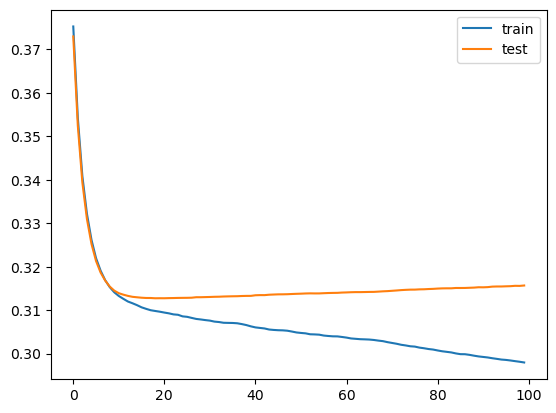

In [36]:
# Plot learning curves
import matplotlib.pyplot as plt
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# display legend
plt.legend()
# render
plt.show()

In [37]:
# Set XGBoost parameters
xgb_params = {
    'objective':                    'binary:logistic',
    'predictor':                    'cpu_predictor',
    'disable_default_eval_metric':  'true',
    'max_depth':                     8,
    'learning_rate':                 0.1,
    'subsample':                     1,
    'gamma':                         0,
    'reg_lambda':                    10,
    'scale_pos_weight':              1,
    'tree_method':                  'hist', 
    'n_estimators':                  1000,
}

# Train the model
t1_start = perf_counter()  # Time fit function
model_xgb= xgb.XGBClassifier(**xgb_params)
model_xgb.fit(X_train,y_train, eval_metric='logloss', eval_set=evalset, verbose=True)
t1_stop = perf_counter()
print ("It took", t1_stop-t1_start,"seconds to fit.")

[0]	validation_0-logloss:0.39911	validation_1-logloss:0.39668
[1]	validation_0-logloss:0.38691	validation_1-logloss:0.38479
[2]	validation_0-logloss:0.37672	validation_1-logloss:0.37488
[3]	validation_0-logloss:0.36811	validation_1-logloss:0.36654
[4]	validation_0-logloss:0.36078	validation_1-logloss:0.35947
[5]	validation_0-logloss:0.35443	validation_1-logloss:0.35340
[6]	validation_0-logloss:0.34898	validation_1-logloss:0.34823
[7]	validation_0-logloss:0.34423	validation_1-logloss:0.34372
[8]	validation_0-logloss:0.34009	validation_1-logloss:0.33979
[9]	validation_0-logloss:0.33651	validation_1-logloss:0.33646
[10]	validation_0-logloss:0.33337	validation_1-logloss:0.33352
[11]	validation_0-logloss:0.33060	validation_1-logloss:0.33093
[12]	validation_0-logloss:0.32816	validation_1-logloss:0.32870
[13]	validation_0-logloss:0.32596	validation_1-logloss:0.32672
[14]	validation_0-logloss:0.32405	validation_1-logloss:0.32500
[15]	validation_0-logloss:0.32233	validation_1-logloss:0.32348
[1

In [39]:
# Check model accuracy
result_predict_xgb_test = model_xgb.predict(X_test)
acc = np.mean(np.array(y_test) == result_predict_xgb_test)
print("Model accuracy =",acc)

Model accuracy = 0.8307510022081465


In [40]:
# retrieve performance metrics
results = model_xgb.evals_result()

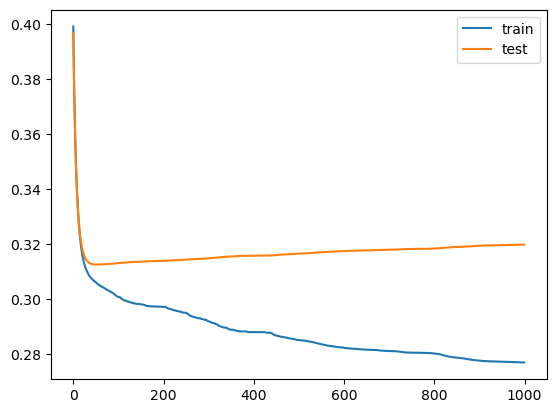

In [41]:
# Plot learning curves
import matplotlib.pyplot as plt
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# display legend
plt.legend()
# render
plt.show()